In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import json

In [2]:
# LOAD DATA

# hard coded file locations
df = pd.read_csv('/Users/Christian/Udacity/listings.csv')
seattle_geo = r'/Users/Christian/Udacity/seattle.json'

# open the json file - json.load() methods returns a python dictionary
with open(seattle_geo) as seattle_file:
    seattle_json = json.load(seattle_file)

In [3]:
# WRANGLE DATA

# create a new column where zipcodes are strings
df['c.zipcode'] = df['zipcode'].astype(str)

# remove all rows where zipcodes are not strings of five characters
df = df[df['c.zipcode'].map(len) == 5]

# create a new column where prices are floats
df['c.price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [10]:
# First question: What zipcode is the most expensive to get an airbnb?
df_zipcode_grouped = df[['zipcode', 'c.price']].groupby('zipcode').agg({'c.price': ['mean', 'median']})

df_zipcode_grouped.columns = ['c.price_mean', 'c.price_median']
df_zipcode_grouped.reset_index(inplace=True)

# initialize the Seattle map
SeattleMap = folium.Map(location=[47.6062, -122.3321], tiles='Stamen Toner', zoom_start=9)

SeattleMap.Choropleth(geo_data = seattle_json,
                      data = df_zipcode_grouped,
                      columns = ['zipcode', 'c.price_mean'],
                      key_on = 'feature.properties.GEOID10',
                      fill_color = 'YlGn',
                      fill_opacity = 1)

# hard coded location for html
SeattleMap.save('/Users/Christian/Udacity/SeattleChoropleth.html')

AttributeError: 'Map' object has no attribute 'Choropleth'

[Text(0, 0, 'Yurt'),
 Text(0, 0, 'Camper/RV'),
 Text(0, 0, 'Cabin'),
 Text(0, 0, 'Loft'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Dorm'),
 Text(0, 0, 'Bungalow'),
 Text(0, 0, 'Townhouse'),
 Text(0, 0, 'Apartment'),
 Text(0, 0, 'House'),
 Text(0, 0, 'Bed & Breakfast'),
 Text(0, 0, 'Condominium'),
 Text(0, 0, 'Treehouse'),
 Text(0, 0, 'Tent'),
 Text(0, 0, 'Boat'),
 Text(0, 0, 'Chalet')]

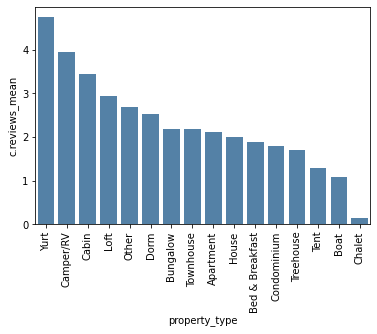

In [6]:
# What type of airbnb gets the most reviews?
df_type_grouped = df[['property_type', 'reviews_per_month']].groupby('property_type').agg({'reviews_per_month': ['mean', 'median']})

df_type_grouped.columns = ['c.reviews_mean', 'c.reviews_median']
df_type_grouped.reset_index(inplace=True)

# who v/s fare barplot
barchart = sns.barplot(x = 'property_type',
            y = 'c.reviews_mean',
            data = df_type_grouped,
            order = df_type_grouped.sort_values('c.reviews_mean',ascending = False).property_type,
            color = 'steelblue')

barchart.set_xticklabels(barchart.get_xticklabels(), rotation=90)

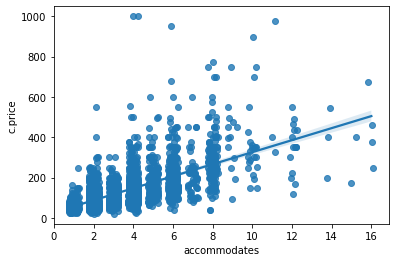

In [7]:
# How does the number of guests an airbnb can accomodate relate to price?
scatterplot = sns.regplot('accommodates',
            y = 'c.price',
            data = df,
            x_jitter=.25)

# Show the plot
plt.show()